# Work Flow

1. Understand the problem 
2. Data Collection 
3. Data Cleaning 
4. Data Exploration and Analysis
5. Data Visualization
6. Interpret the results

# Understand the problem

To analyze and visualize past Olympics data for drawing crucial insights. Performing Exploratory Data Analysis (EDA) on Olympics Data.

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

# Data Collection

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
# loading the  athelete events dataset

athletes = pd.read_csv('athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# loading the  noc regions dataset

region = pd.read_csv('noc_regions.csv')
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
# merging the two datasets

data = pd.merge(athletes, region, on='NOC', how='left')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
# dataset size
data.shape

(271116, 17)

# Data Cleaning

In [6]:
# information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [7]:
# checking for null values
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [8]:
# replacing missing values with their mean values

data["Age"].fillna((data["Age"].mean()), inplace = True)
data["Height"].fillna((data["Height"].mean()), inplace = True)
data["Weight"].fillna((data["Weight"].mean()), inplace = True)
data['Medal'].fillna('No Medal', inplace = True)

data.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     266077
dtype: int64

# Data Exploration and Analysis

In [9]:
# statistical summary
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


In [10]:
# Indian athletes details
data.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,No Medal,India,NaN
506,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,No Medal,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,No Medal,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,No Medal,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.00000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,No Medal,India,NaN


In [11]:
# winter olympics sports

winter_sports = data[data.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [12]:
# summer olympics sports

summer_sports = data[data.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [13]:
# Total medals won

data.Medal.value_counts()

No Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64

In [14]:
# Finding out the cities that have hosted Games
# grouping by the cities based on unique year values and later we will be sorting the data based on
# no. of occurance of each cities which hosted based on occurance

City = data.groupby('City').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
City.columns = ['City','Years']
City['Occurence'] = [len(c) for c in City['Years']]
City.sort_values('Occurence',ascending=False)

,City,Years,Occurence
3,Athina,"[2004, 1906, 1896]",3
17,London,"[2012, 1948, 1908]",3
30,Sankt Moritz,"[1928, 1948]",2
26,Paris,"[1900, 1924]",2
37,Stockholm,"[1912, 1956]",2
18,Los Angeles,"[1932, 1984]",2
15,Lake Placid,"[1980, 1932]",2
14,Innsbruck,"[1964, 1976]",2
0,Albertville,[1992],1
27,Rio de Janeiro,[2016],1


In [15]:
# Finding out participation of Men and Women at the Olympic games

print('Total number of athletes in Olymics:',len(data.ID.unique()))
print('Number of female participants in 120 years:',len(data[data.Sex=='F']))
print('Number of male participants in 120 years:',len(data[data.Sex=='M']))

Total number of athletes in Olymics: 135571
Number of female participants in 120 years: 74522
Number of male participants in 120 years: 196594


In [16]:
# medals by India

India = data[(data['region']=='India')]
medals = India['Medal'].value_counts()
medals

No Medal    1211
Gold         138
Bronze        40
Silver        19
Name: Medal, dtype: int64

In [17]:
India['Gold'] = India['Medal'].map({'Gold': 1, 'Bronze': 0,'Silver':0})
India['Silver'] = India['Medal'].map({'Gold': 0, 'Bronze': 0,'Silver':1})
India['Bronze'] = India['Medal'].map({'Gold': 0, 'Bronze': 1,'Silver':0})
total_medals = India.groupby(['Year']).sum()
total_medals.head()

<ipython-input-17-48c0e57c5092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India['Gold'] = India['Medal'].map({'Gold': 1, 'Bronze': 0,'Silver':0})
<ipython-input-17-48c0e57c5092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India['Silver'] = India['Medal'].map({'Gold': 0, 'Bronze': 0,'Silver':1})
<ipython-input-17-48c0e57c5092>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,ID,Age,Height,Weight,Gold,Silver,Bronze
Year,,,,,,,
1900,485330,120.000000,876.694849,353.511965,0.0,2.0,0.0
1920,275178,178.898289,1227.372789,494.916750,0.0,0.0,0.0
1924,2667544,848.239679,5435.508066,2191.774180,7.0,0.0,0.0
1928,1462936,598.012085,4211.779397,1696.857430,14.0,0.0,0.0
1932,1788779,628.455187,4550.389699,1838.262215,15.0,0.0,0.0


# Data Visualization

In [18]:
# Top  10 countries with highest participants since starting of olympics

top_10_countries = data.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

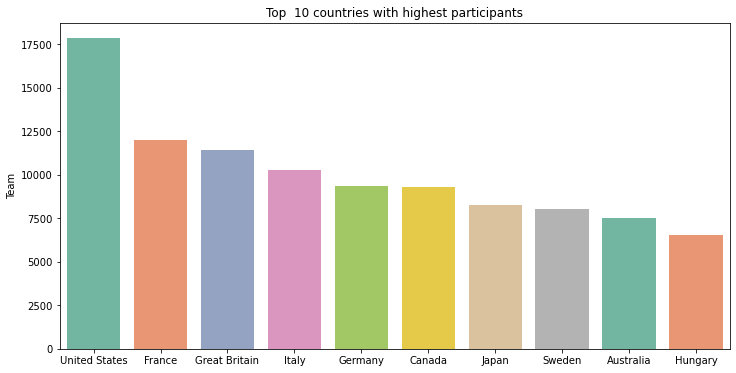

In [19]:
# plotting for top 10 countries

plt.figure(figsize=(12,6))
plt.title('Top  10 countries with highest participants')
sb.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')
plt.show()

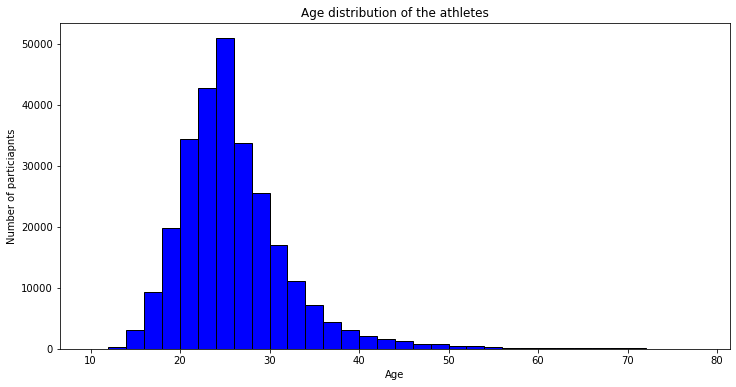

In [20]:
# Age distribution of the athletes

plt.figure(figsize=(12,6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of particiapnts')
plt.hist(data.Age, bins=np.arange(10,80,2), color='blue', edgecolor = 'black')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


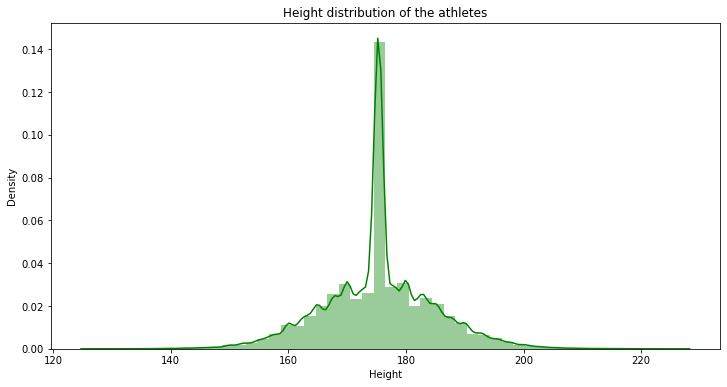

In [21]:
# height distribution of the athletes

plt.figure(figsize=(12,6))
plt.title('Height distribution of the athletes')
sb.distplot(data['Height'], color='Green')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


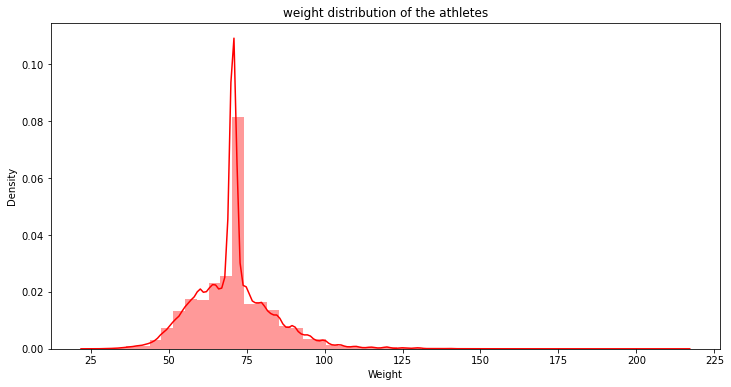

In [22]:
# weight distribution of the athletes

plt.figure(figsize=(12,6))
plt.title('weight distribution of the athletes')
sb.distplot(data['Weight'], color='red')
plt.show()

In [23]:
# male and female athletes

gender_count = data.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

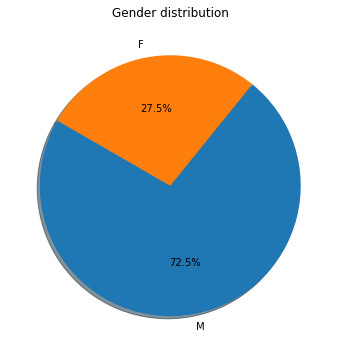

In [24]:
# pie chart of male and female athletes

plt.figure(figsize=(12,6))
plt.title('Gender distribution')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=150, shadow=True)
plt.show()

In [25]:
# total number of female atheletes in each year

female_participants = data[(data.Sex=='F') & (data.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head(10)

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [26]:
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


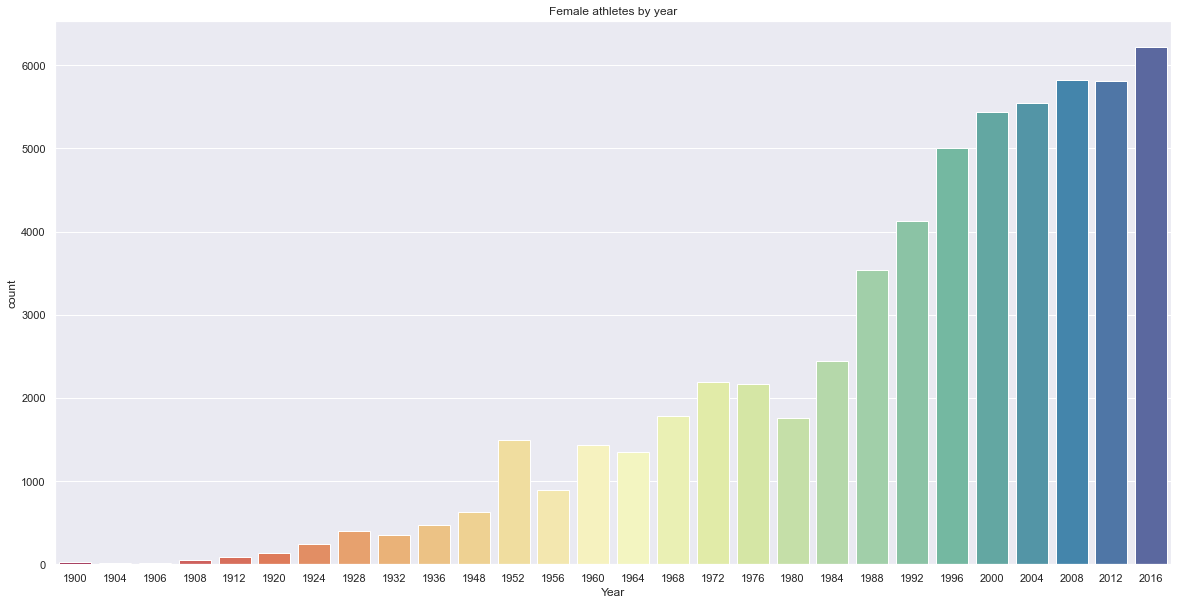

In [27]:
# plotting of female atheletes in each year

women_participants = data[(data.Sex=='F') & (data.Season=='Summer')]

sb.set(style='darkgrid')
plt.figure(figsize=(20,10))
sb.countplot(x='Year', data=women_participants, palette='Spectral')
plt.title('Female athletes by year')
plt.show()

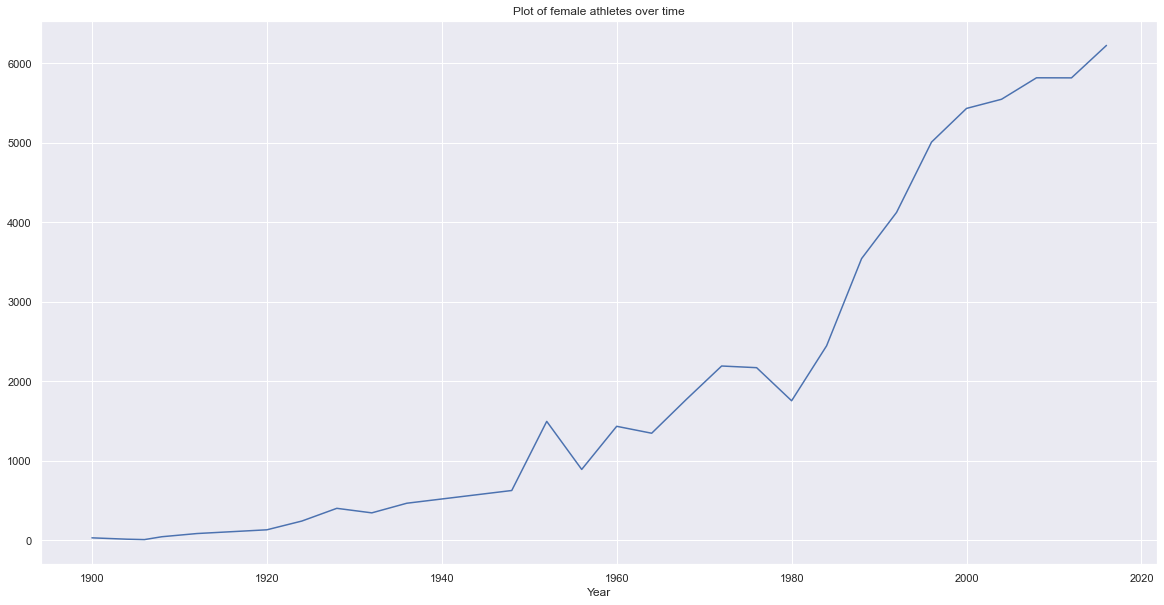

In [28]:
# plotting by line plot

part = women_participants.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of female athletes over time')
plt.show()

In [29]:
# Gold medal athletes

Gold_medals = data[(data.Medal == 'Gold')]
Gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [30]:
# gold medals beyond age 60
Gold_medals['ID'][Gold_medals['Age'] > 60].count()

6

In [31]:
# Sporting event
Sporting_event = Gold_medals['Sport'][Gold_medals['Age']>60]
Sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


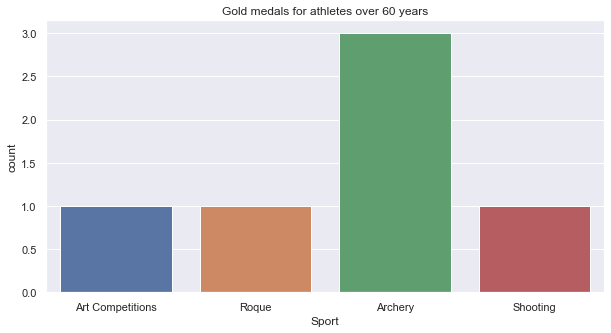

In [32]:
# Plotting the sporting event

plt.figure(figsize=(10,5))
sb.countplot(Sporting_event)
plt.title('Gold medals for athletes over 60 years')
plt.show()

In [33]:
# Gold medals from each country
Gold_medals.region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


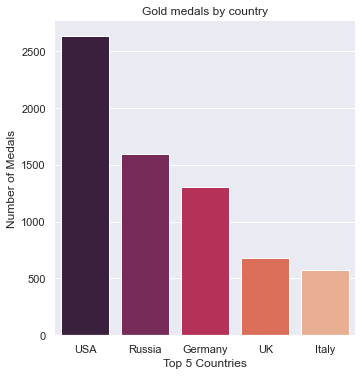

In [34]:
# plotting the gold medals by country

total_gold_medas = Gold_medals.region.value_counts().reset_index(name='Medal').head()

g = sb.catplot(x='index', y='Medal', data=total_gold_medas, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 5 Countries')
g.set_ylabels('Number of Medals')
plt.title('Gold medals by country')
plt.show()

In [35]:
# Rio olympics

max_year = data.Year.max()

team_names = data[(data.Year == max_year) & (data.Medal == 'Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

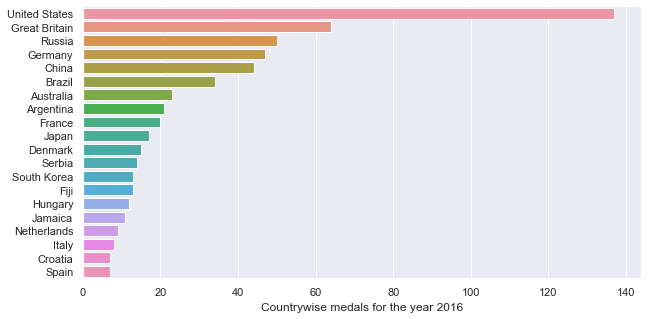

In [36]:
# Plotting the Rio olympics data

plt.figure(figsize=(10,5))
sb.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.xlabel('Countrywise medals for the year 2016')
plt.show()

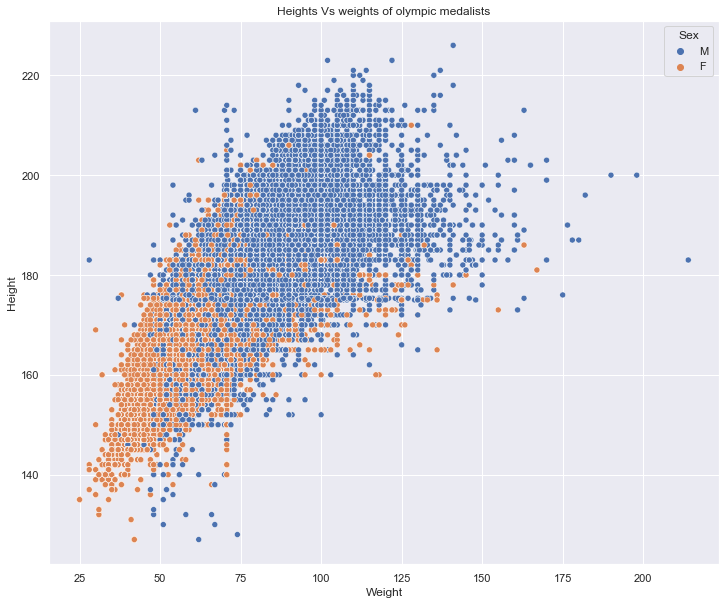

In [37]:
# plotting Heights Vs weights of athletes who have won the medals

not_null_medals = data[(data['Height'].notnull()) & (data['Weight'].notnull())]

plt.figure(figsize=(12,10))
axis = sb.scatterplot(x='Weight', y='Height', data=not_null_medals, hue='Sex')
plt.title('Heights Vs weights of olympic medalists')
plt.show()